In [2]:
from fastai.imports import *
from pathlib import Path
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import graphviz
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
sns_palette = sns.color_palette("muted")


In [3]:
df = pd.read_csv("Credit_card.csv")
labels = pd.read_csv("Credit_card_label.csv")
dep = 'Approved'

df[dep] = labels.label.astype(int)

df.loc[df[dep] == 1, 'Status'] = 'Approved'
df.loc[df[dep] == 0, 'Status'] = 'Declined'
print('Total records:', len(df))


Total records: 1548


C:\Users\egors\AppData\Local\Temp\ipykernel_31356\1199831272.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Approved' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df[dep] == 1, 'Status'] = 'Approved'


In [4]:
df.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Approved,Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1,Approved
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,Approved
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved


In [5]:
df.drop('Ind_ID', axis=1).describe()


,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Approved
count,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [6]:
print('Modes')
print('----------------------')
df.drop('Ind_ID', axis=1).mode().iloc[0]


Modes
----------------------


GENDER                                         F
Car_Owner                                      N
Propert_Owner                                  Y
CHILDREN                                     0.0
Annual_income                           135000.0
Type_Income                              Working
EDUCATION          Secondary / secondary special
Marital_status                           Married
Housing_type                   House / apartment
Birthday_count                          -22655.0
Employed_days                           365243.0
Mobile_phone                                 1.0
Work_Phone                                   0.0
Phone                                        0.0
EMAIL_ID                                     0.0
Type_Occupation                         Laborers
Family_Members                               2.0
Approved                                     0.0
Status                                  Declined
Name: 0, dtype: object

In [7]:
df.isna().sum()


Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
Approved             0
Status               0
dtype: int64

In [8]:
approved = df[df[dep] == 1]
declined = df[df[dep] == 0]


In [9]:
df.corr(numeric_only=True)


,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Approved
Ind_ID,1.000000,0.032535,0.030147,0.022909,-0.055396,NaN,0.085794,0.008403,-0.037923,0.016950,0.016796
CHILDREN,0.032535,1.000000,0.078497,0.279716,-0.219095,NaN,0.035014,-0.004908,0.025776,0.890248,-0.021646
Annual_income,0.030147,0.078497,1.000000,0.111638,-0.160175,NaN,-0.071171,-0.006439,0.122320,0.050957,0.027456
Birthday_count,0.022909,0.279716,0.111638,1.000000,-0.619039,NaN,0.174687,-0.029215,0.166749,0.266527,-0.045097
Employed_days,-0.055396,-0.219095,-0.160175,-0.619039,1.000000,NaN,-0.231184,-0.003403,-0.118268,-0.238705,0.031408
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.085794,0.035014,-0.071171,0.174687,-0.231184,NaN,1.000000,0.352439,-0.009594,0.072228,-0.007046
Phone,0.008403,-0.004908,-0.006439,-0.029215,-0.003403,NaN,0.352439,1.000000,0.018105,0.005372,-0.000664
EMAIL_ID,-0.037923,0.025776,0.122320,0.166749,-0.118268,NaN,-0.009594,0.018105,1.000000,0.035098,0.012921
Family_Members,0.016950,0.890248,0.050957,0.266527,-0.238705,NaN,0.072228,0.005372,0.035098,1.000000,-0.030709


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


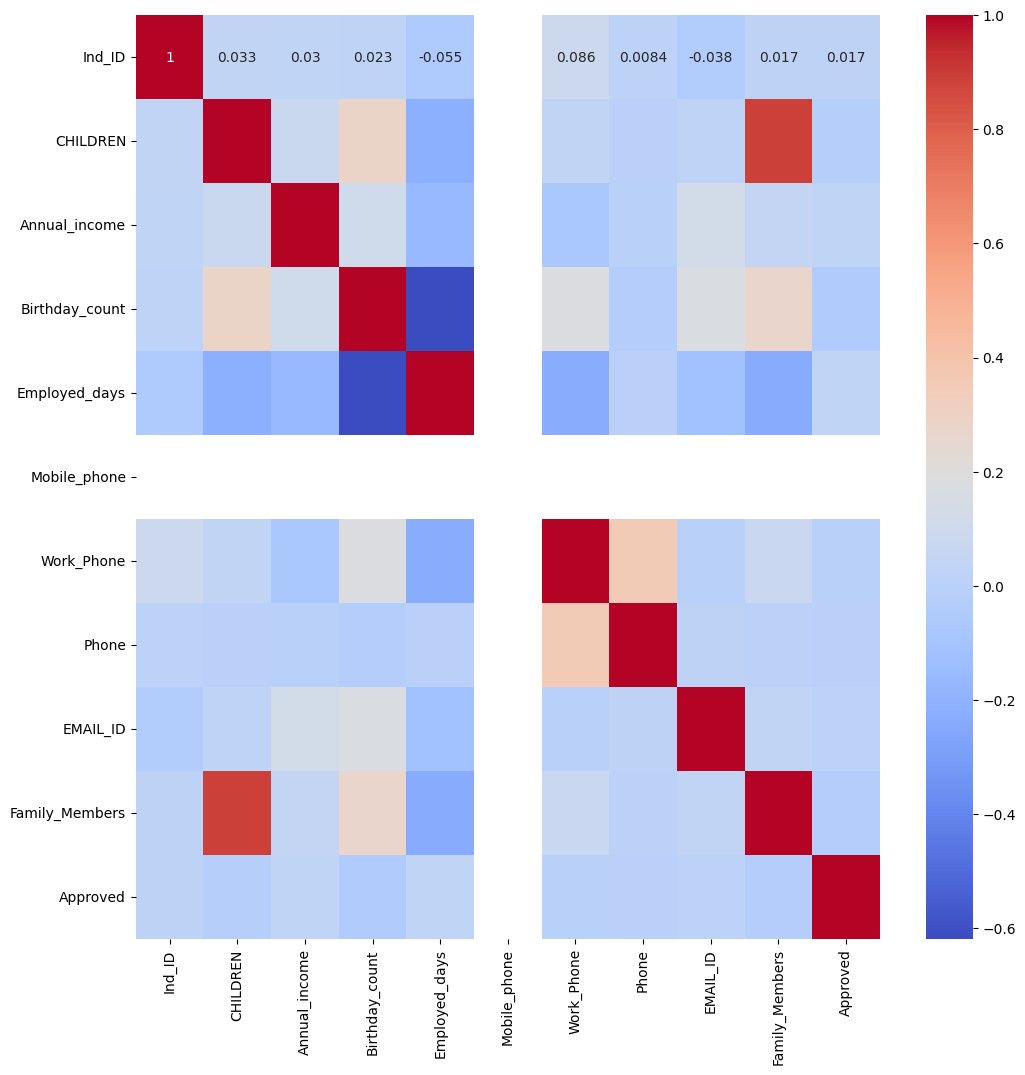

In [10]:
correlation = df.corr(method='pearson',numeric_only=True)
plt.figure(figsize=(12, 12))  # Установите размер 
sns.heatmap(correlation, annot=True, cmap='coolwarm') # Тепловая карта
plt.show()


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Count')

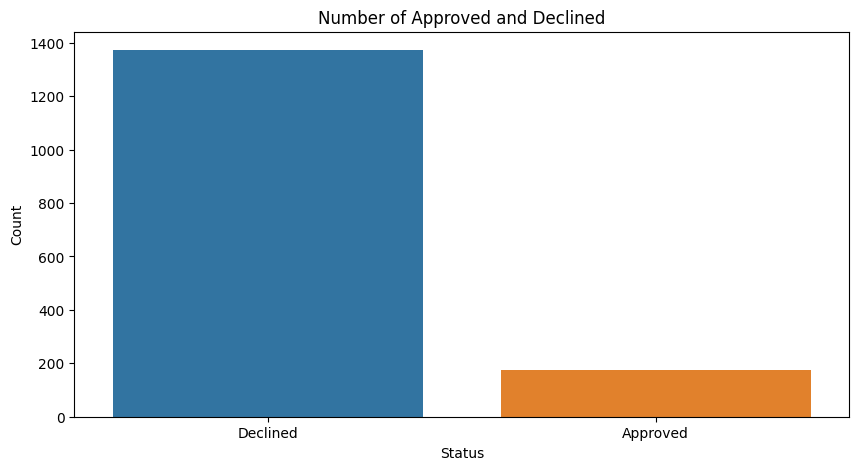

In [11]:


plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df['Status'].value_counts().index, y=df['Approved'].value_counts().values)
plt.title('Number of Approved and Declined')
plt.ylabel('Count')


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


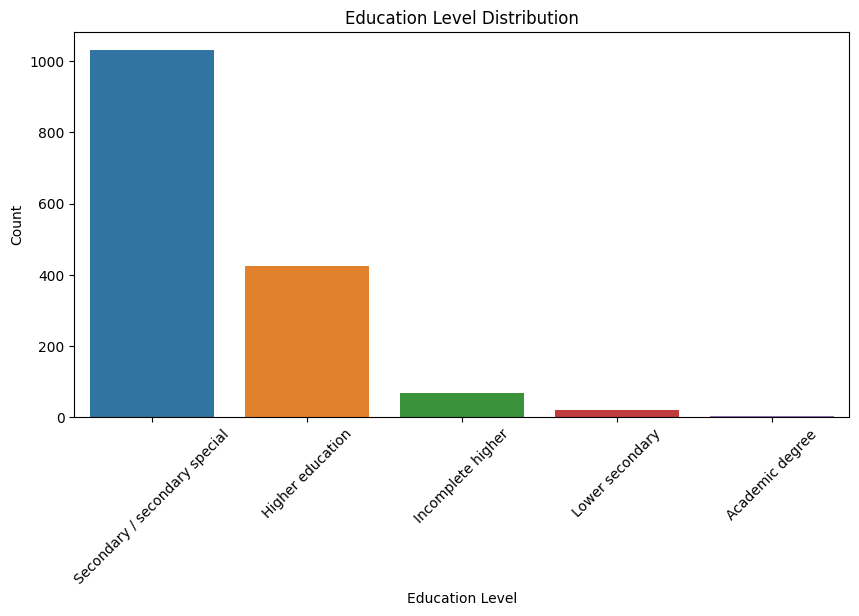

In [12]:
plt.figure(figsize=(10, 5))

eds = df.EDUCATION.value_counts().index
sns.barplot(x=eds, y=df.EDUCATION.value_counts().values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


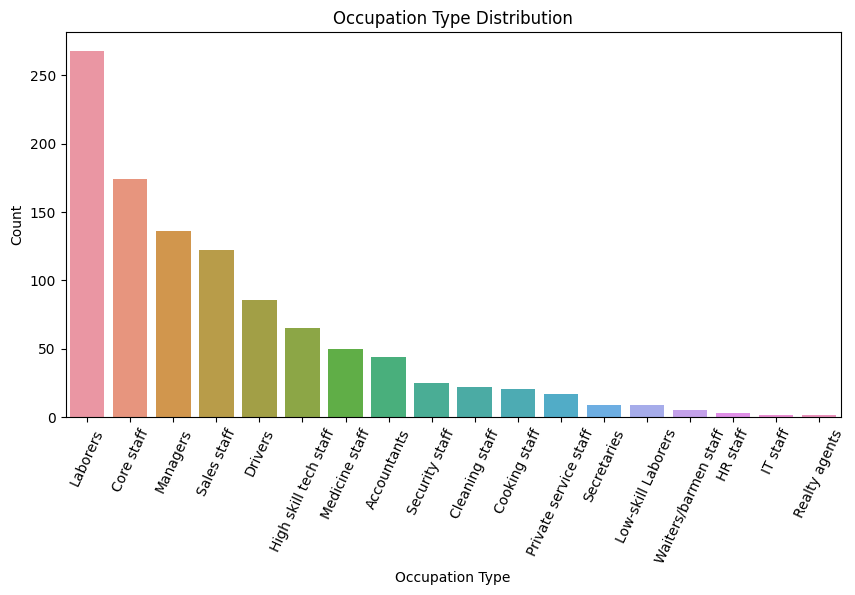

In [13]:
plt.figure(figsize=(10, 5))

occ_types = df.Type_Occupation.value_counts().index
sns.barplot(x=occ_types, y=df.Type_Occupation.value_counts().values)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Occupation Type Distribution')
plt.xticks(rotation=65)
plt.show()


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


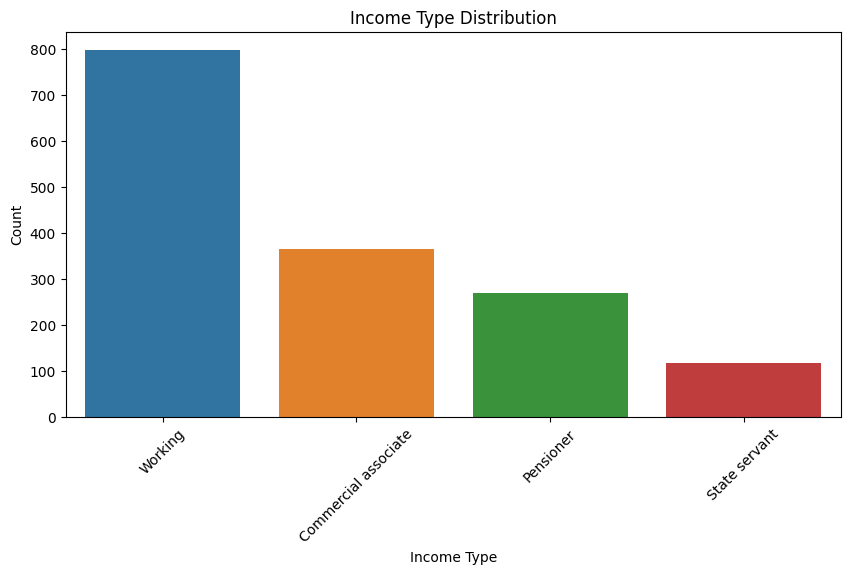

In [14]:
plt.figure(figsize=(10, 5))

occ_types = df.Type_Income.value_counts().index
sns.barplot(x=occ_types, y=df.Type_Income.value_counts().values)
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Income Type Distribution')
plt.xticks(rotation=45)
plt.show()


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


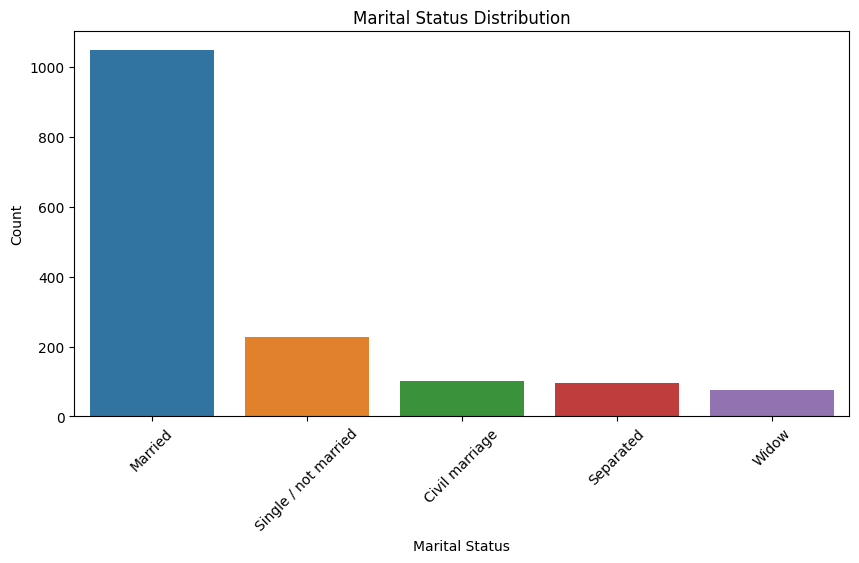

In [15]:
plt.figure(figsize=(10, 5))

marital_types = df.Marital_status.value_counts().index
sns.barplot(x=marital_types, y=df.Marital_status.value_counts().values)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-25000.0, 20000.0)

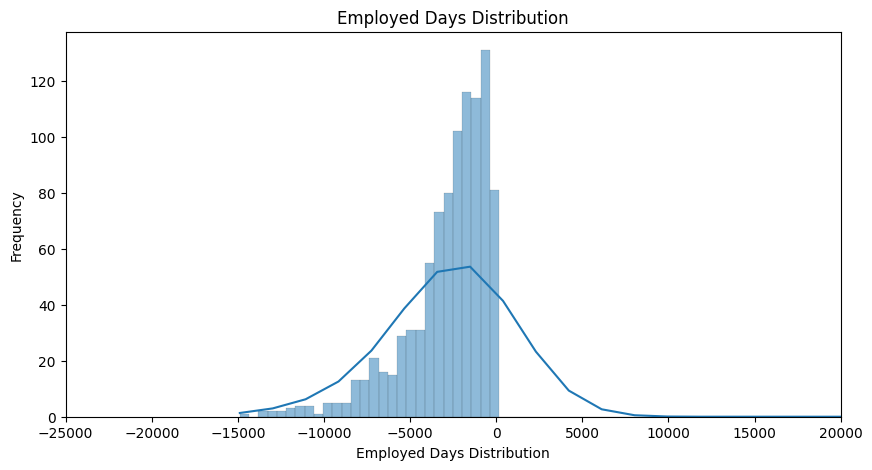

In [16]:
plt.figure(figsize=(10, 5))

emp_days = df.Employed_days.value_counts().index
sns.histplot(x=emp_days, kde=True)
plt.xlabel('Employed Days Distribution')
plt.ylabel('Frequency')
plt.title('Employed Days Distribution')
plt.xlim(-25000, 20000)


e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


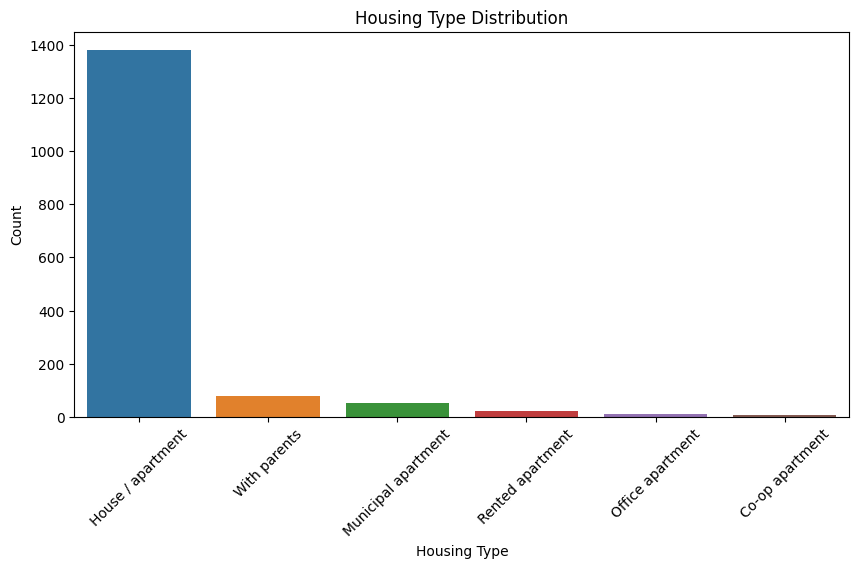

In [17]:
plt.figure(figsize=(10, 5))

housing_types = df.Housing_type.value_counts().index
sns.barplot(x=housing_types, y=df.Housing_type.value_counts().values)
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.title('Housing Type Distribution')
plt.xticks(rotation=45)
plt.show()


In [18]:
cats = [
    'GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income',
    'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone',
    'Work_Phone', 'Phone', 'Type_Occupation', 'EMAIL_ID'
]

conts = [
    'CHILDREN', 'Family_Members', 'Annual_income',
    'Age', 'EmployedDaysOnly', 'UnemployedDaysOnly'
]


In [19]:
def proc_data():
    df['Age'] = -df.Birthday_count // 365
    df['EmployedDaysOnly'] = df.Employed_days.apply(lambda x: x if x > 0 else 0)
    df['UnemployedDaysOnly'] = df.Employed_days.apply(lambda x: abs(x) if x < 0 else 0)

    for cat in cats:
        df[cat] = pd.Categorical(df[cat])

    modes = df.mode().iloc[0]
    df.fillna(modes, inplace=True)

proc_data()


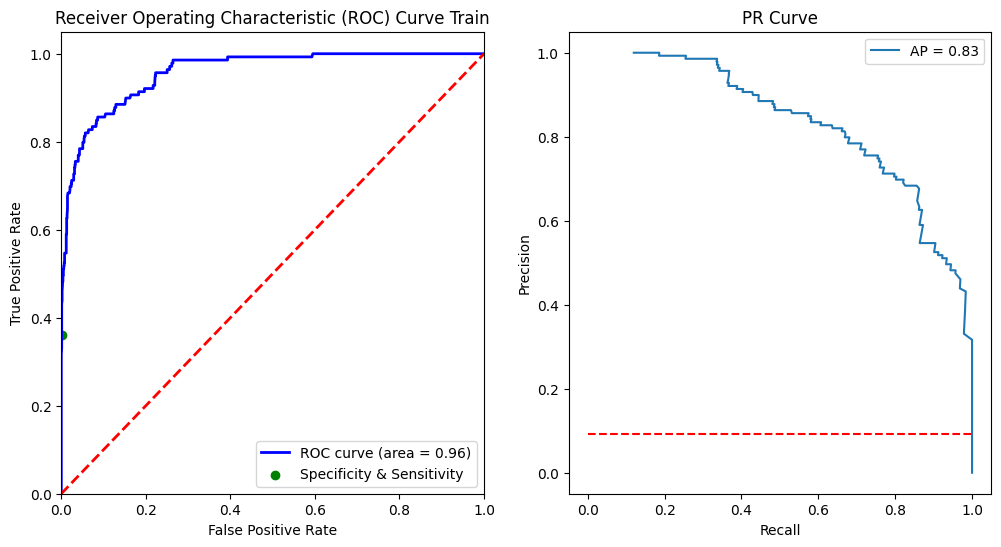

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1022
           1       0.98      0.36      0.53       139

    accuracy                           0.92      1161
   macro avg       0.95      0.68      0.74      1161
weighted avg       0.93      0.92      0.91      1161

specificity: 0.9990215264187867 	 sensitivity: 0.3597122302158273


In [62]:
from sklearn.metrics import average_precision_score


X, y = df[cats + conts].copy(), df[dep]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

X_train[cats] = X_train[cats].apply(lambda x: x.cat.codes)
X_test[cats] = X_test[cats].apply(lambda x: x.cat.codes)


model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
# Предсказание на тестовом наборе
y_pred = model.predict_proba(X_train)[:,1]

# Оценка точности
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)
precision, recall, _ = precision_recall_curve(y_train, y_pred)
average_precision = average_precision_score(y_train, y_pred)
# Вычисление специфичности и чувствительности
tn, fp, fn, tp = confusion_matrix(y_train, (y_pred > 0.5)).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
# Построение ROC-кривой
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.scatter([1-specificity], [sensitivity], color='green', label='Specificity & Sensitivity')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Train')
plt.legend(loc="lower right")


plt.subplot(1, 2, 2)
plt.plot(precision, recall, label=f"AP = {average_precision:.2f}")
noskill = len(y_train[y_train==1])/len(y_train)
plt.plot([0, 1], [noskill, noskill],'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'PR Curve')
plt.legend()
plt.show()


y_pred = model.predict(X_train)
print(boost := classification_report(y_train, y_pred))
print(f"specificity: {specificity} \t sensitivity: {sensitivity}")


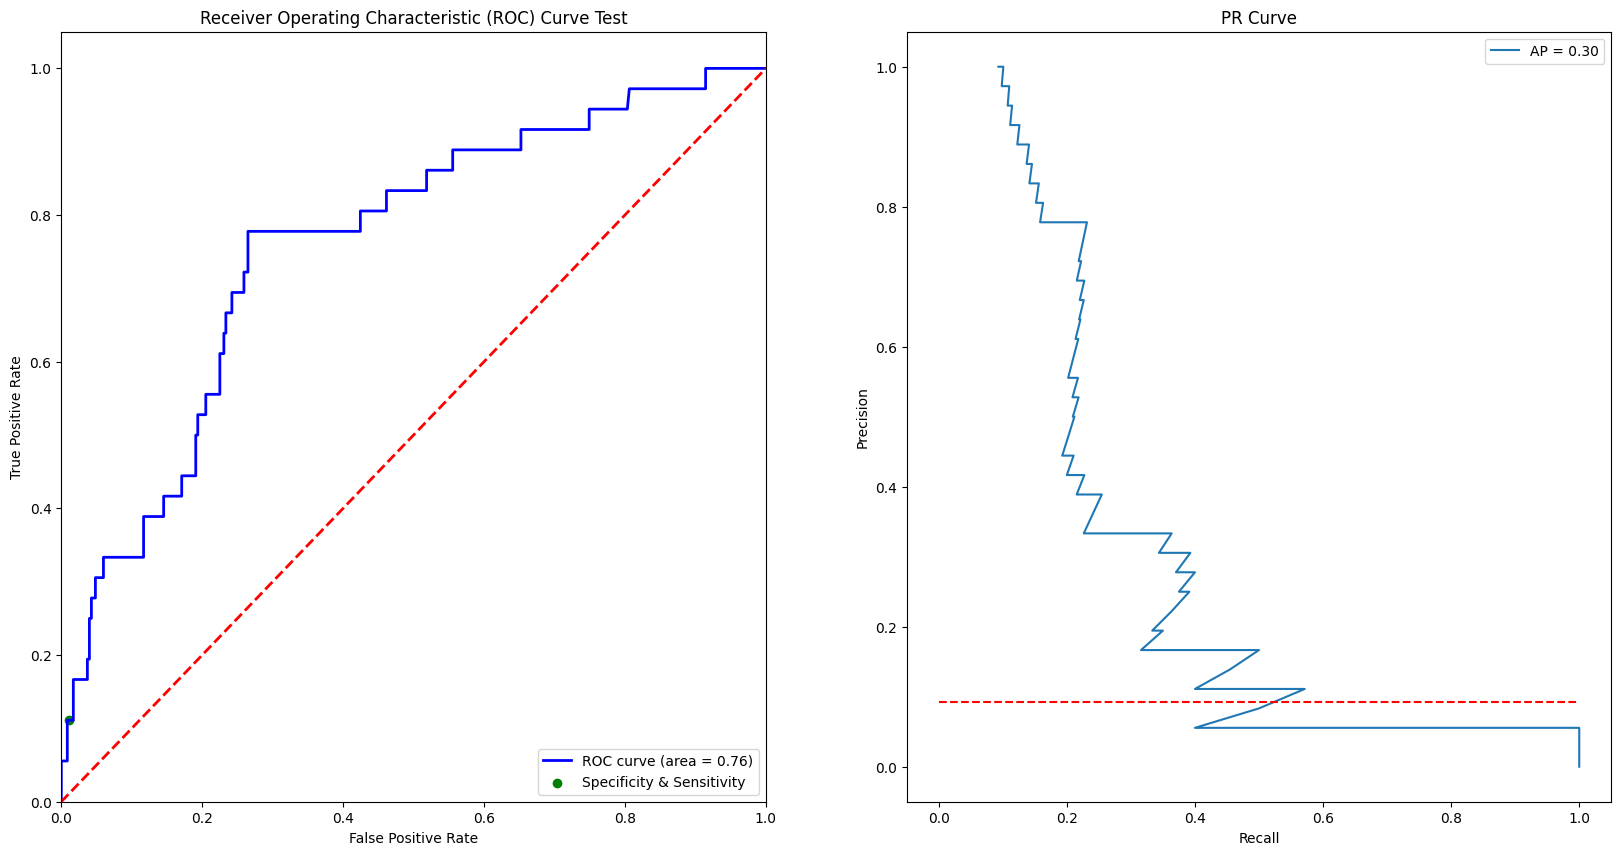

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       351
           1       0.50      0.11      0.18        36

    accuracy                           0.91       387
   macro avg       0.71      0.55      0.57       387
weighted avg       0.88      0.91      0.88       387

specificity: 0.9886039886039886 	 sensitivity: 0.1111111111111111


In [73]:
X, y = df[cats + conts].copy(), df[dep]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

X_train[cats] = X_train[cats].apply(lambda x: x.cat.codes)
X_test[cats] = X_test[cats].apply(lambda x: x.cat.codes)


model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
# Предсказание на тестовом наборе
y_pred = model.predict_proba(X_test)[:,1]

# Оценка точности
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Вычисление специфичности и чувствительности
tn, fp, fn, tp = confusion_matrix(y_test, (y_pred > 0.5)).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
# Построение ROC-кривой
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.scatter([1-specificity], [sensitivity], color='green', label='Specificity & Sensitivity')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Test')
plt.legend(loc="lower right")


plt.subplot(1, 2, 2)
plt.plot(precision, recall, label=f"AP = {average_precision:.2f}")
noskill = len(y_test[y_test==1])/len(y_test)
plt.plot([0, 1], [noskill, noskill],'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'PR Curve')
plt.legend()
plt.show()

plt.show()


y_pred = model.predict(X_test)
print(boost := classification_report(y_test, y_pred))
print(f"specificity: {specificity} \t sensitivity: {sensitivity}")


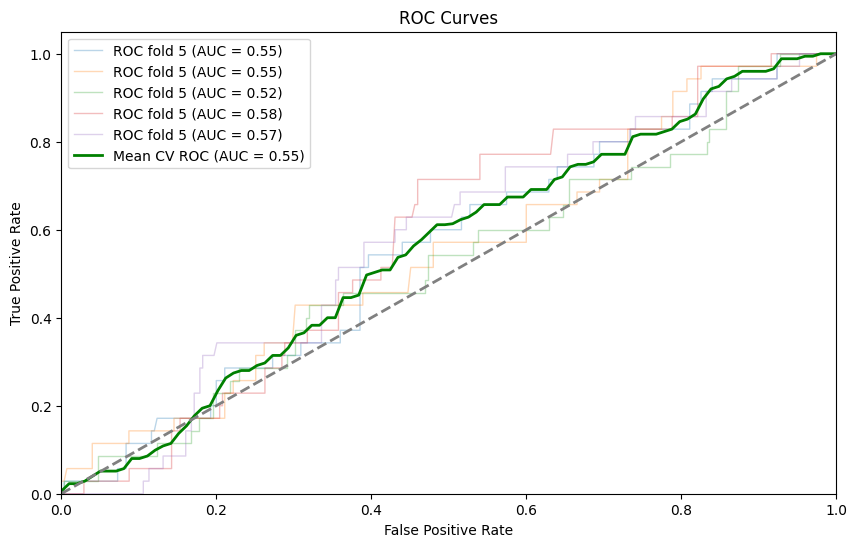

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Определите список категориальных столбцов

cv = StratifiedKFold(n_splits=5)
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = 0

plt.figure(figsize=(10, 6))

for train, test in cv.split(X, y):
    # Кодирование категориальных данных
    X_train, X_test = X.iloc[train].copy(), X.iloc[test].copy()
    X_train[cats] = X_train[cats].apply(lambda x: x.cat.codes)
    X_test[cats] = X_test[cats].apply(lambda x: x.cat.codes)
    
    # Обучение модели
    model = GradientBoostingClassifier()
    model.fit(X_train, y.iloc[train])
    y_scores_cv = model.predict_proba(X_test)[:, 1]

    # Расчет ROC-кривой
    fpr, tpr, _ = roc_curve(y.iloc[test], y_scores_cv)
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC fold {cv.get_n_splits()} (AUC = {roc_auc:.2f})')

mean_tpr /= cv.get_n_splits()
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='green', lw=2, label=f'Mean CV ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


AdaBoost AUC: 0.6725229503007281
Gradient Boosting (Log loss) AUC: 0.7589822728711618
Gradient Boosting (Exponential) AUC: 0.7457264957264956


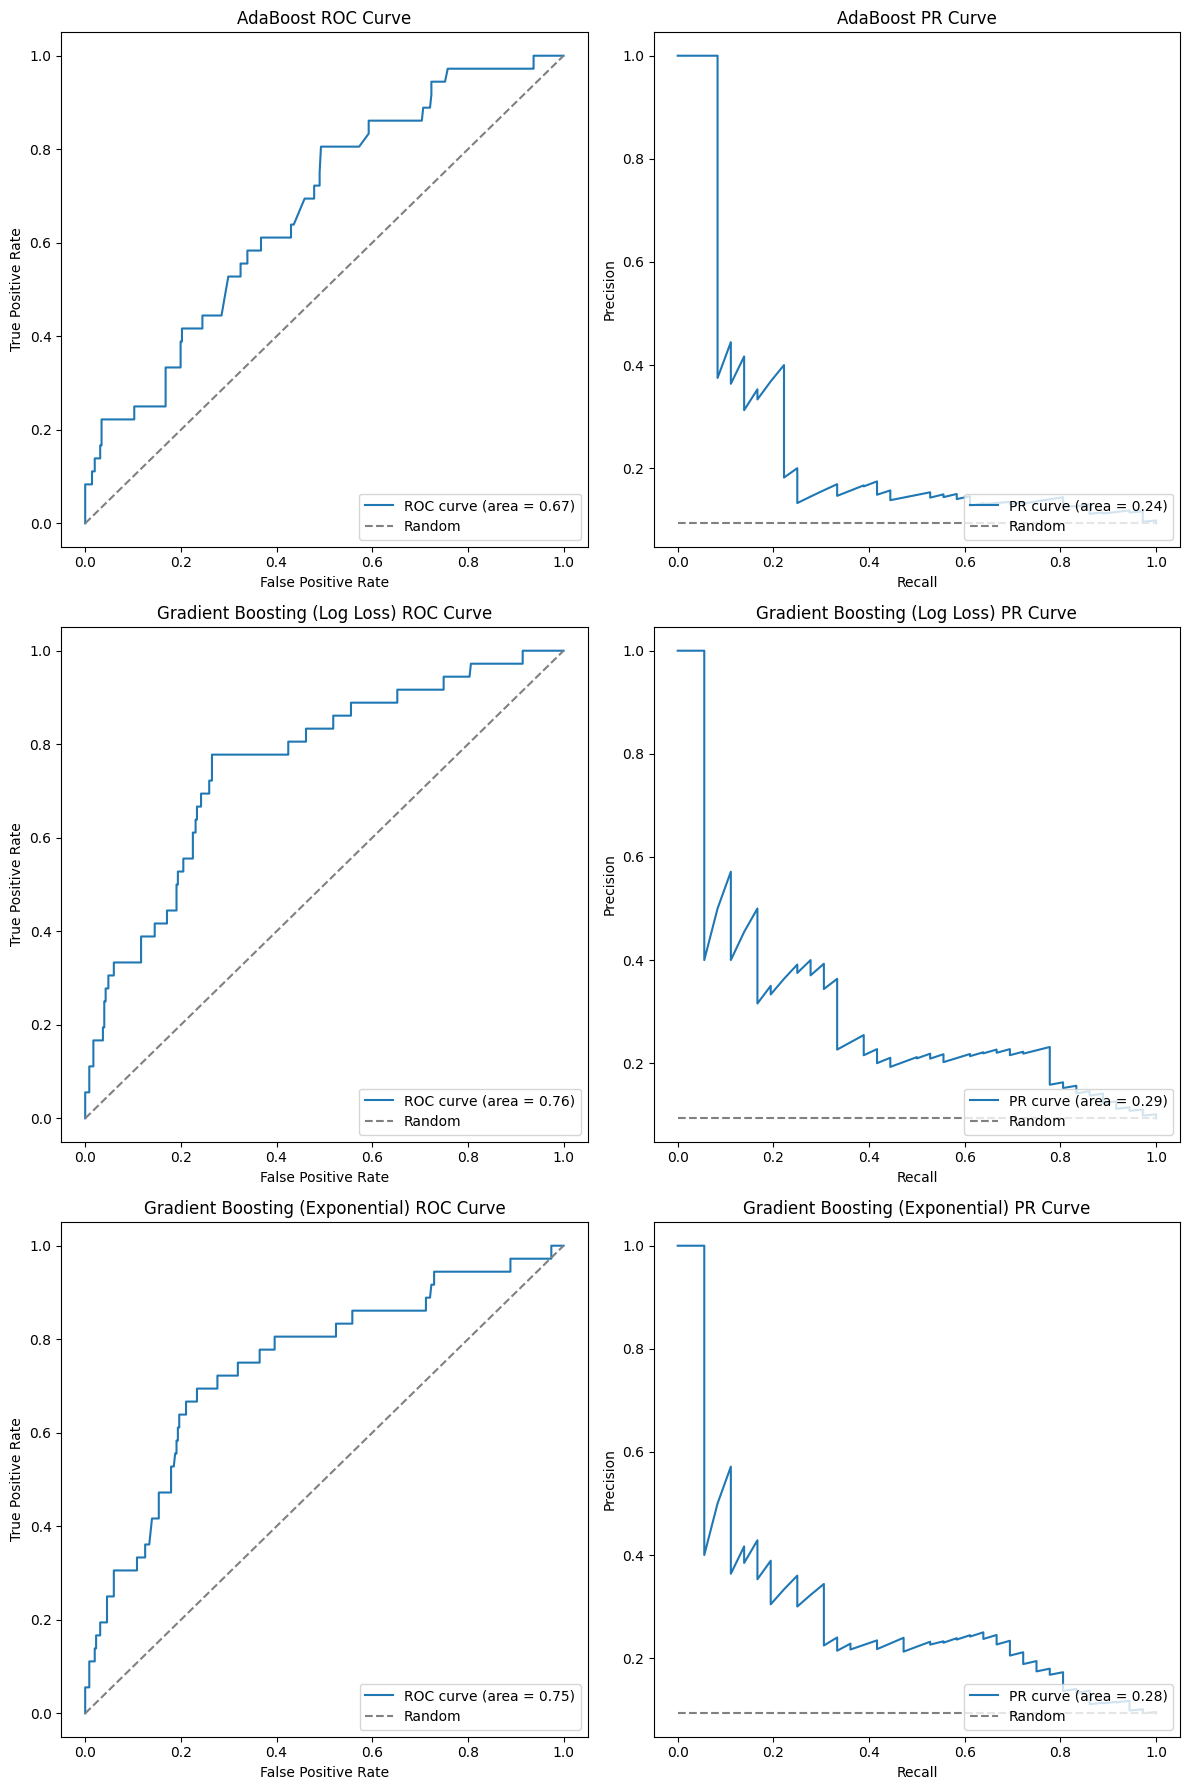

In [74]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

X, y = df[cats + conts].copy(), df[dep]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

X_train[cats] = X_train[cats].apply(lambda x: x.cat.codes)
X_test[cats] = X_test[cats].apply(lambda x: x.cat.codes)

# Обучение AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict_proba(X_test)[:, 1]
ada_auc = roc_auc_score(y_test, y_pred_ada)

# Обучение Gradient Boosting с deviance (log loss)
gb_deviance_model = GradientBoostingClassifier(loss='log_loss', random_state=42)
gb_deviance_model.fit(X_train, y_train)
y_pred_gb_deviance = gb_deviance_model.predict_proba(X_test)[:, 1]
gb_deviance_auc = roc_auc_score(y_test, y_pred_gb_deviance)

# Обучение Gradient Boosting с exponential
gb_exponential_model = GradientBoostingClassifier(loss='exponential', random_state=42)
gb_exponential_model.fit(X_train, y_train)
y_pred_gb_exponential = gb_exponential_model.predict_proba(X_test)[:, 1]
gb_exponential_auc = roc_auc_score(y_test, y_pred_gb_exponential)

# Вывод результатов
print(f"AdaBoost AUC: {ada_auc}")
print(f"Gradient Boosting (Log loss) AUC: {gb_deviance_auc}")
print(f"Gradient Boosting (Exponential) AUC: {gb_exponential_auc}")

# Функция для построения ROC и PR кривых с линиями baseline
def plot_curve_with_baseline(subplot, x, y, auc, title, xlabel, ylabel, baseline, curve_type='ROC'):
    subplot.plot(x, y, label=f'{curve_type} curve (area = {auc:.2f})')
    subplot.plot(baseline[0], baseline[1], linestyle='--', color='gray', label='Random')
    subplot.set_xlabel(xlabel)
    subplot.set_ylabel(ylabel)
    subplot.set_title(title)
    subplot.legend(loc='lower right')

# Создание фигуры с несколькими подграфиками
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

# ROC и PR кривые для AdaBoost
fpr, tpr, _ = roc_curve(y_test, y_pred_ada)
precision, recall, _ = precision_recall_curve(y_test, y_pred_ada)
plot_curve_with_baseline(axs[0, 0], fpr, tpr, ada_auc, 'AdaBoost ROC Curve', 'False Positive Rate', 'True Positive Rate', [[0, 1], [0, 1]])
plot_curve_with_baseline(axs[0, 1], recall, precision, auc(recall, precision), 'AdaBoost PR Curve', 'Recall', 'Precision', [[0, 1], [len(y_test[y_test==1]) / len(y_test)]*2], curve_type='PR')

# ROC и PR кривые для Gradient Boosting Deviance
fpr, tpr, _ = roc_curve(y_test, y_pred_gb_deviance)
precision, recall, _ = precision_recall_curve(y_test, y_pred_gb_deviance)
plot_curve_with_baseline(axs[1, 0], fpr, tpr, gb_deviance_auc, 'Gradient Boosting (Log Loss) ROC Curve', 'False Positive Rate', 'True Positive Rate', [[0, 1], [0, 1]])
plot_curve_with_baseline(axs[1, 1], recall, precision, auc(recall, precision), 'Gradient Boosting (Log Loss) PR Curve', 'Recall', 'Precision', [[0, 1], [len(y_test[y_test==1]) / len(y_test)]*2], curve_type='PR')

# ROC и PR кривые для Gradient Boosting Exponential
fpr, tpr, _ = roc_curve(y_test, y_pred_gb_exponential)
precision, recall, _ = precision_recall_curve(y_test, y_pred_gb_exponential)
plot_curve_with_baseline(axs[2, 0], fpr, tpr, gb_exponential_auc, 'Gradient Boosting (Exponential) ROC Curve', 'False Positive Rate', 'True Positive Rate', [[0, 1], [0, 1]])
plot_curve_with_baseline(axs[2, 1], recall, precision, auc(recall, precision), 'Gradient Boosting (Exponential) PR Curve', 'Recall', 'Precision', [[0, 1], [len(y_test[y_test==1]) / len(y_test)]*2], curve_type='PR')

plt.tight_layout()
plt.show()
